In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report as report
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
df = pd.read_csv('cross/train0.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test0.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)

In [14]:
rf_clf=RandomForestClassifier(
    n_estimators=21,
    criterion="gini",
    max_depth=4,
    random_state=0)
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None, min_samples_split=20, min_samples_leaf=21),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
xgb = XGBClassifier(learning_rate=0.01,max_depth=10)

In [15]:
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
from vecstack import stacking
from sklearn import metrics
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)

In [17]:
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))

Final 测试集准确率：0.975

Final 测试集精确率：0.975

Final 测试集召回率：0.975

Final 测试集f1评分：0.975



In [18]:
history={'accuracy':[],'f_score':[]}
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

In [19]:
df = pd.read_csv('cross/train1.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test1.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)

In [20]:
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.99375

Final 测试集精确率：0.99375

Final 测试集召回率：0.99375

Final 测试集f1评分：0.99375



In [23]:
df = pd.read_csv('cross/train2.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test2.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.95625

Final 测试集精确率：0.95625

Final 测试集召回率：0.95625

Final 测试集f1评分：0.95625



In [24]:
df = pd.read_csv('cross/train3.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test3.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.96875

Final 测试集精确率：0.96875

Final 测试集召回率：0.96875

Final 测试集f1评分：0.96875



In [25]:
df = pd.read_csv('cross/train4.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test4.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.9625

Final 测试集精确率：0.9625

Final 测试集召回率：0.9625

Final 测试集f1评分：0.9625000000000001



In [26]:
df = pd.read_csv('cross/train5.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test5.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：1.0

Final 测试集精确率：1.0

Final 测试集召回率：1.0

Final 测试集f1评分：1.0



In [27]:
df = pd.read_csv('cross/train6.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test6.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.99375

Final 测试集精确率：0.99375

Final 测试集召回率：0.99375

Final 测试集f1评分：0.99375



In [28]:
df = pd.read_csv('cross/train7.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test7.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.94375

Final 测试集精确率：0.94375

Final 测试集召回率：0.94375

Final 测试集f1评分：0.94375



In [29]:
df = pd.read_csv('cross/train8.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test8.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.9875

Final 测试集精确率：0.9875

Final 测试集召回率：0.9875

Final 测试集f1评分：0.9875



In [30]:
df = pd.read_csv('cross/train9.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)
df = pd.read_csv('cross/test9.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)
rf_clf.fit(X_train,y_train)
bdt.fit(X_train,y_train)
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=False)
# 模型融合
model_list = [rf_clf,bdt,xgb]
S_train, S_test = stacking(model_list, X_train, y_train,X_test, regression=False, n_folds=11)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, y_train)

# # Predict
y_pred = model_s.predict(S_test)
# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, y_test)
precision_score_test = metrics.precision_score(y_pred, y_test,average='micro')
recall_score_test = metrics.recall_score(y_pred, y_test,average='micro')
f1_score_test = metrics.f1_score(y_pred, y_test,average='micro')


print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
history['accuracy'].append(acc_score_test)
history['f_score'].append(f1_score_test)

Final 测试集准确率：0.95

Final 测试集精确率：0.95

Final 测试集召回率：0.95

Final 测试集f1评分：0.9500000000000001



In [38]:
# 构造绘图函数
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def drow(history):
    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='accuracy')
    plt.title('rf+bdt+xgb模型融合十则验证正确率变化图')
    plt.xlabel('验证集序号')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

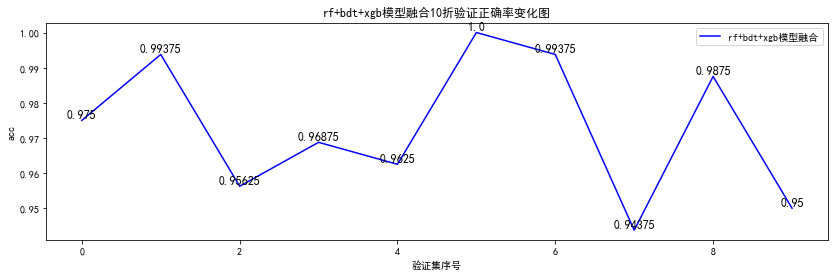

In [57]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文

x_axis_data = [0,1, 2, 3, 4, 5,6,7,8,9]
y_axis_data = history['accuracy']

plt.figure(figsize=(14, 4))
# plot中参数的含义分别是横轴值，纵轴值，线的形状，颜色，透明度,线的宽度和标签
plt.plot(x_axis_data, y_axis_data,  color='b', label='rf+bdt+xgb模型融合')
plt.legend(loc="upper right")
plt.title('rf+bdt+xgb模型融合10折验证正确率变化图')
plt.xlabel('验证集序号')
plt.ylabel('acc')
# 设置数字标签
for a, b in zip(x_axis_data, y_axis_data):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.show()

In [58]:
avg=0
for temp in history['accuracy']:
    avg=avg+temp
avg=avg/10
print(avg)

0.9731249999999999
